In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from sklearn.metrics import matthews_corrcoef, accuracy_score, root_mean_squared_error, mean_squared_error, mean_absolute_error, precision_score, confusion_matrix, multilabel_confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import gc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2025-04-05 21:28:19.575586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743877699.591944  408339 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743877699.597227  408339 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743877699.610320  408339 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743877699.610336  408339 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743877699.610338  408339 computation_placer.cc:177] computation placer alr

# Functions

In [2]:
def visualize_CM(matrix):
    """
    Visualize Correlation Matrix
    """
    sns.heatmap(matrix,annot=True)

# Load data

In [3]:
data = pd.read_csv('data/CIC_IoT2023/multiclass_classification_data.csv')

In [4]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'label', 'Class'], axis=1)

In [5]:
data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack Type
0,0.000000,54.00,6.00,64.00,3.618015,3.618015,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.349527e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS
1,0.009783,54.58,5.94,65.27,6.194132,6.194132,0.0,0.0,0.0,0.0,...,0.013077,54.06,8.333111e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS
2,0.070909,20365.00,17.00,64.00,4916.980560,4916.980560,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310205e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS
3,0.000000,53.46,5.94,63.36,4.807711,4.807711,0.0,0.0,0.0,0.0,...,0.249154,54.06,8.333188e+07,9.5,10.399888,0.352811,0.426318,0.15,141.55,DDoS
4,0.937490,97.20,6.00,64.00,1.714645,1.714645,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336119e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS


In [6]:
data.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack Type
118172,3066.037345,10267.5,11.5,130.5,1.029689,1.029689,0.0,0.0,0.0,0.0,...,48.073719,175.9,4.020541e-02,5.5,15.420603,67.986505,3619.117272,0.9,38.5,Bruteforce
118173,343.000496,106722.4,12.6,96.3,3.483237,3.483237,0.0,0.0,0.0,0.0,...,53.837593,81.8,1.666014e+08,13.5,13.133269,76.311509,2921.188688,1.0,244.6,Bruteforce
118174,199.262425,16583.6,9.3,118.9,0.319272,0.319272,0.0,0.0,0.0,0.0,...,71.998962,101.7,2.843370e-02,5.5,14.011221,101.821908,7002.672673,0.9,38.5,Bruteforce
118175,177.979327,29709.7,9.3,93.8,1.760932,1.760932,0.0,0.0,0.0,0.0,...,66.139131,94.8,1.666014e+08,13.5,14.883212,93.714094,4411.596919,1.0,244.6,Bruteforce
118176,299.487685,38503.2,15.3,57.6,2.423920,2.423920,0.0,0.0,0.0,0.0,...,77.932213,137.4,1.224859e-02,5.5,14.286196,110.212793,9866.644535,0.9,38.5,Bruteforce


In [7]:
X = data.drop(['Attack Type'], axis = 1)
y = data['Attack Type']

In [8]:
X.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,54.00,6.00,64.00,3.618015,3.618015,0.0,0.0,1.0,0.0,...,54.000000,0.000000,54.00,8.349527e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
1,0.009783,54.58,5.94,65.27,6.194132,6.194132,0.0,0.0,0.0,0.0,...,54.003000,0.013077,54.06,8.333111e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
2,0.070909,20365.00,17.00,64.00,4916.980560,4916.980560,0.0,0.0,0.0,0.0,...,50.000000,0.000000,50.00,8.310205e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55
3,0.000000,53.46,5.94,63.36,4.807711,4.807711,0.0,0.0,0.0,0.0,...,54.078864,0.249154,54.06,8.333188e+07,9.5,10.399888,0.352811,0.426318,0.15,141.55
4,0.937490,97.20,6.00,64.00,1.714645,1.714645,0.0,0.0,1.0,0.0,...,54.000000,0.000000,54.00,8.336119e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55


In [9]:
y

0               DDoS
1               DDoS
2               DDoS
3               DDoS
4               DDoS
             ...    
118172    Bruteforce
118173    Bruteforce
118174    Bruteforce
118175    Bruteforce
118176    Bruteforce
Name: Attack Type, Length: 118177, dtype: object

In [1]:
le = LabelEncoder()

y = le.fit_transform(y)

NameError: name 'LabelEncoder' is not defined

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Multiclass Classification

In [12]:
results_dict = {}

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100450, 46), (100450,), (17727, 46), (17727,))

# K Nearest Neighbour

In [14]:
%%time

knn_clf = KNeighborsClassifier(n_jobs=8)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

CPU times: user 8.88 s, sys: 13.6 ms, total: 8.89 s
Wall time: 2.34 s


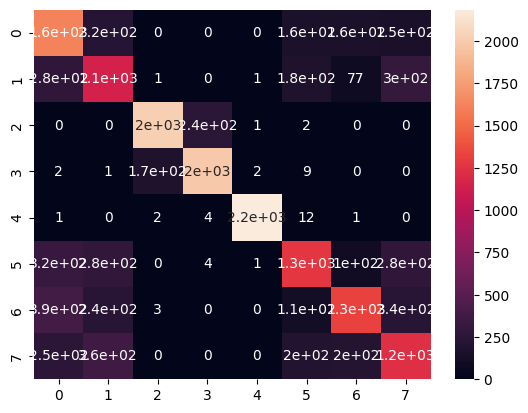

In [15]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [16]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [17]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["kNN"] = results

In [18]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.721216,0.727553,0.721862,0.721216,0.682195,1.040729,5.298979,2.301951


# Logistic Regression

In [19]:
%%time

lr_clf = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga', n_jobs=8)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

CPU times: user 7min 10s, sys: 418 ms, total: 7min 11s
Wall time: 7min 11s


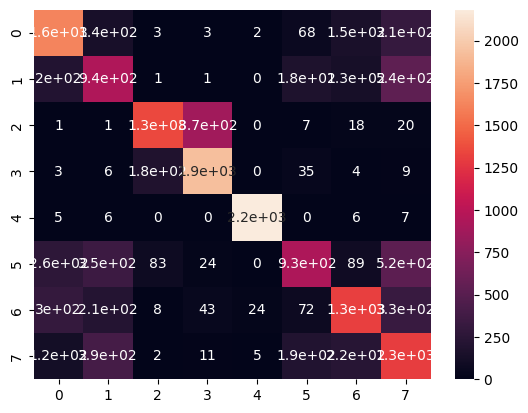

In [20]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [21]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [22]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["LR"] = results

In [23]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.721216,0.727553,0.721862,0.721216,0.682195,1.040729,5.298979,2.301951
LR,0.652507,0.668264,0.650963,0.652507,0.605456,1.199639,5.867885,2.422372


# Random Forest

In [24]:
%%time

rf_clf = RandomForestClassifier(n_jobs=8)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

CPU times: user 40.2 s, sys: 235 ms, total: 40.5 s
Wall time: 5.4 s


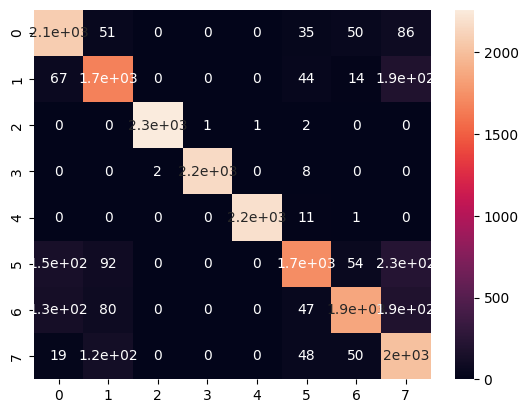

In [25]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [26]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [27]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["RF"] = results

In [28]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.721216,0.727553,0.721862,0.721216,0.682195,1.040729,5.298979,2.301951
LR,0.652507,0.668264,0.650963,0.652507,0.605456,1.199639,5.867885,2.422372
RF,0.900829,0.905657,0.901160,0.900829,0.887299,0.372426,1.873301,1.368686


# XGBoost

In [29]:
%%time

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

CPU times: user 29.1 s, sys: 169 ms, total: 29.3 s
Wall time: 3.83 s


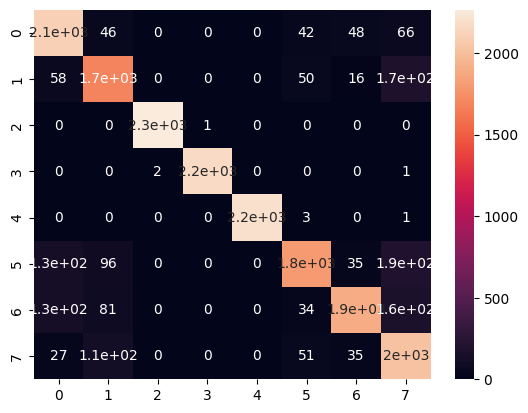

In [30]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [31]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [32]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["XGBoost"] = results

In [33]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.721216,0.727553,0.721862,0.721216,0.682195,1.040729,5.298979,2.301951
LR,0.652507,0.668264,0.650963,0.652507,0.605456,1.199639,5.867885,2.422372
RF,0.900829,0.905657,0.901160,0.900829,0.887299,0.372426,1.873301,1.368686
XGBoost,0.910588,0.914341,0.910867,0.910588,0.898286,0.349411,1.775709,1.332557


# LightGBM

In [34]:
%%time

lgbm_clf = lightgbm.LGBMClassifier()
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5239
[LightGBM] [Info] Number of data points in the train set: 100450, number of used features: 39
[LightGBM] [Info] Start training from score -2.068531
[LightGBM] [Info] Start training from score -2.194104
[LightGBM] [Info] Start training from score -2.065385
[LightGBM] [Info] Start training from score -2.057796
[LightGBM] [Info] Start training from score -2.060684
[LightGBM] [Info] Start training from score -2.064443
[LightGBM] [Info] Start training from score -2.068137
[LightGBM] [Info] Start training from score -2.063658


/home/kostas/Documents/git/Magistrinis/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CPU times: user 13.1 s, sys: 80.4 ms, total: 13.1 s
Wall time: 3.38 s


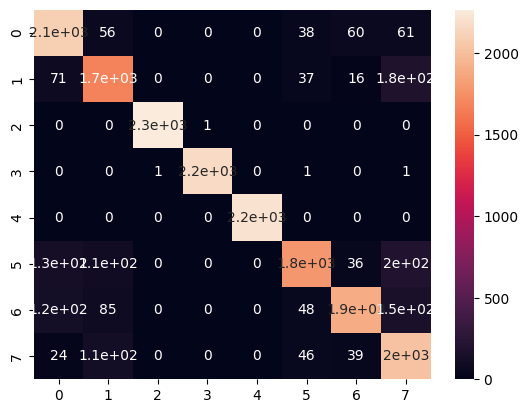

In [35]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [36]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [37]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["LightGBM"] = results

In [38]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.721216,0.727553,0.721862,0.721216,0.682195,1.040729,5.298979,2.301951
LR,0.652507,0.668264,0.650963,0.652507,0.605456,1.199639,5.867885,2.422372
RF,0.900829,0.905657,0.901160,0.900829,0.887299,0.372426,1.873301,1.368686
XGBoost,0.910588,0.914341,0.910867,0.910588,0.898286,0.349411,1.775709,1.332557
LightGBM,0.908501,0.912338,0.908719,0.908501,0.895930,0.352457,1.781125,1.334588


# Support Vector Machine

In [39]:
%%time

svm_clf = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

CPU times: user 39min 21s, sys: 2.76 s, total: 39min 23s
Wall time: 39min 31s


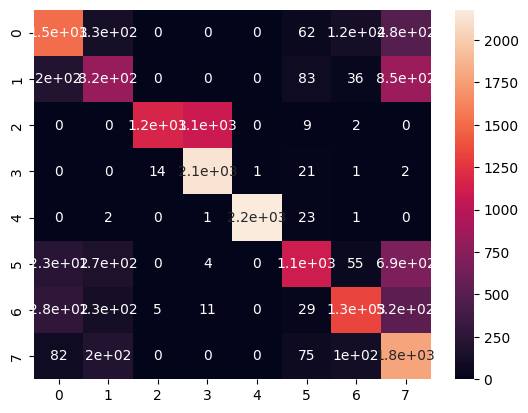

In [40]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [41]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [42]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["SVM"] = results

In [43]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.721216,0.727553,0.721862,0.721216,0.682195,1.040729,5.298979,2.301951
LR,0.652507,0.668264,0.650963,0.652507,0.605456,1.199639,5.867885,2.422372
RF,0.900829,0.905657,0.901160,0.900829,0.887299,0.372426,1.873301,1.368686
XGBoost,0.910588,0.914341,0.910867,0.910588,0.898286,0.349411,1.775709,1.332557
LightGBM,0.908501,0.912338,0.908719,0.908501,0.895930,0.352457,1.781125,1.334588
SVM,0.678569,0.736196,0.678502,0.678569,0.641993,1.114627,5.686975,2.384738


# Feed Forward Neural Network

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((82369, 46), (82369,), (18081, 46), (18081,), (17727, 46), (17727,))

In [72]:
def create_model(X_train, y_train):
    model = keras.Sequential()
    model.add(keras.layers.Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(len(np.unique(y_train)), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model(X_train, y_train)

/home/kostas/Documents/git/Magistrinis/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 46)             │         2,162 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,042 (320.48 KB)

 Trainable params: 82,042 (320.48 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
%%time
model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_val, y_val))
gc.collect();

Epoch 1/100
5149/5149 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6344 - loss: 0.8957 - val_accuracy: 0.6922 - val_loss: 0.7288
Epoch 2/100
5149/5149 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7070 - loss: 0.7024 - val_accuracy: 0.7166 - val_loss: 0.6810
Epoch 3/100
5149/5149 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7172 - loss: 0.6741 - val_accuracy: 0.7239 - val_loss: 0.6791
Epoch 4/100
5149/5149 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7305 - loss: 0.6477 - val_accuracy: 0.7310 - val_loss: 0.6453
Epoch 5/100
5149/5149 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7360 - loss: 0.6326 - val_accuracy: 0.7367 - val_loss: 0.6330
Epoch 6/100
5149/5149 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7398 - loss: 0.6261 - val_accuracy: 0.7395 - val_loss: 0.6310
Epoch 7/100
5149/5149 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7444 - loss: 0.6149 - val_accuracy: 0.7411 - val_loss: 0.6240
Epoch 8/100
5149/5149 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7505 - loss: 

In [75]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


In [76]:
_, accuracy = model.evaluate(X_test, y_test)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7446 - loss: 1.0794 


In [77]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["FF-NN"] = results

In [78]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.721216,0.727553,0.721862,0.721216,0.682195,1.040729,5.298979,2.301951
LR,0.652507,0.668264,0.650963,0.652507,0.605456,1.199639,5.867885,2.422372
RF,0.900829,0.905657,0.901160,0.900829,0.887299,0.372426,1.873301,1.368686
XGBoost,0.910588,0.914341,0.910867,0.910588,0.898286,0.349411,1.775709,1.332557
LightGBM,0.908501,0.912338,0.908719,0.908501,0.895930,0.352457,1.781125,1.334588
SVM,0.678569,0.736196,0.678502,0.678569,0.641993,1.114627,5.686975,2.384738
FF-NN,0.747617,0.751610,0.747935,0.747617,0.711971,0.846280,4.096914,2.024084
LSTM,0.999831,0.999831,0.999831,0.999831,0.999806,0.000621,0.002990,0.054684


# LSTM

In [52]:
# Prepare sequential data
def create_sequences(features, labels, seq_length):
    sequences, seq_labels = [], []
    for i in range(len(features) - seq_length):
        sequences.append(features[i:i + seq_length])
        seq_labels.append(labels[i + seq_length - 1])  # Use the last label in the sequence
    return np.array(sequences), np.array(seq_labels)

In [53]:
num_components = len(np.unique(y))

In [54]:
# Create sequences
seq_length = 20
X1, y1 = create_sequences(X, y, seq_length)
y1 = to_categorical(y1, num_classes=num_components)  # Convert labels to one-hot encoding

In [55]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X1, y1, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [58]:
def create_model_LSTM(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True),
        keras.layers.Dropout(0.3),
        keras.layers.LSTM(32),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [59]:
# Build model
model = create_model_LSTM(input_shape=(seq_length, X1.shape[2]), num_classes=num_components)

In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 20, 64)         │        28,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,464 (169.78 KB)

 Trainable params: 43,464 (169.78 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
%%time

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.9492 - loss: 0.1838 - val_accuracy: 0.9976 - val_loss: 0.0141
Epoch 2/20
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9980 - loss: 0.0094 - val_accuracy: 0.9986 - val_loss: 0.0097
Epoch 3/20
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9984 - val_loss: 0.0087
Epoch 4/20
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9990 - val_loss: 0.0068
Epoch 5/20
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9993 - loss: 0.0047 - val_accuracy: 0.9992 - val_loss: 0.0063
Epoch 6/20
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9993 - val_loss: 0.0057
Epoch 7/20
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 0.9993 - val_loss: 0.0051
Epoch 8/20
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9997 -

In [62]:
# Evaluate model
y_pred = model.predict(X_test)

554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [63]:
_, accuracy = model.evaluate(X_test, y_test)

554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9999 - loss: 0.0013    


In [64]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [65]:
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mcc = matthews_corrcoef(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [66]:
results = [accuracy, precision, f1, recall, mcc, mae, mse, rmse]
results_dict["LSTM"] = results

In [67]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MCC,MAE,MSE,RMSE
kNN,0.721216,0.727553,0.721862,0.721216,0.682195,1.040729,5.298979,2.301951
LR,0.652507,0.668264,0.650963,0.652507,0.605456,1.199639,5.867885,2.422372
RF,0.900829,0.905657,0.901160,0.900829,0.887299,0.372426,1.873301,1.368686
XGBoost,0.910588,0.914341,0.910867,0.910588,0.898286,0.349411,1.775709,1.332557
LightGBM,0.908501,0.912338,0.908719,0.908501,0.895930,0.352457,1.781125,1.334588
SVM,0.678569,0.736196,0.678502,0.678569,0.641993,1.114627,5.686975,2.384738
FF-NN,0.746883,0.759712,0.745651,0.746883,0.712613,0.855982,4.218762,2.053963
LSTM,0.999831,0.999831,0.999831,0.999831,0.999806,0.000621,0.002990,0.054684


# Plot data

In [79]:
results_df = pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MCC", "MAE", "MSE", "RMSE"])

In [80]:
def result_plot(_dict, name):
    attacks = {}
    higher = ["F1", "Accuracy", "Precision", "Recall", "MCC"]
    fig, ax = plt.subplots(figsize=(10,10))
    if name in higher:
        tmp = sorted(_dict.items(), key = lambda x:x[1])
    else:
        tmp = sorted(_dict.items(), key = lambda x:x[1], reverse=True)
    for x in tmp:
        attacks[x[0]] = x[1]
    ax.bar(attacks.keys(), attacks.values())
    rects = ax.patches
    results = [i for i in attacks.values()]
    labels = [f"{results[i]:.6f}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
        )
    if name in higher:
        ax.set_title(f'{name} (higher is better)', fontsize=16, fontweight="bold")
    else:
        ax.set_title(f'{name} (lower is better)', fontsize=16, fontweight="bold")
    ax.set_xlabel(f'{name}')
    ax.set_ylabel('Score')
    ax.grid(which='Major', axis='both')
    ax.set_axisbelow(True)
    plt.savefig(f"images/results/multiclass/{name}.png")

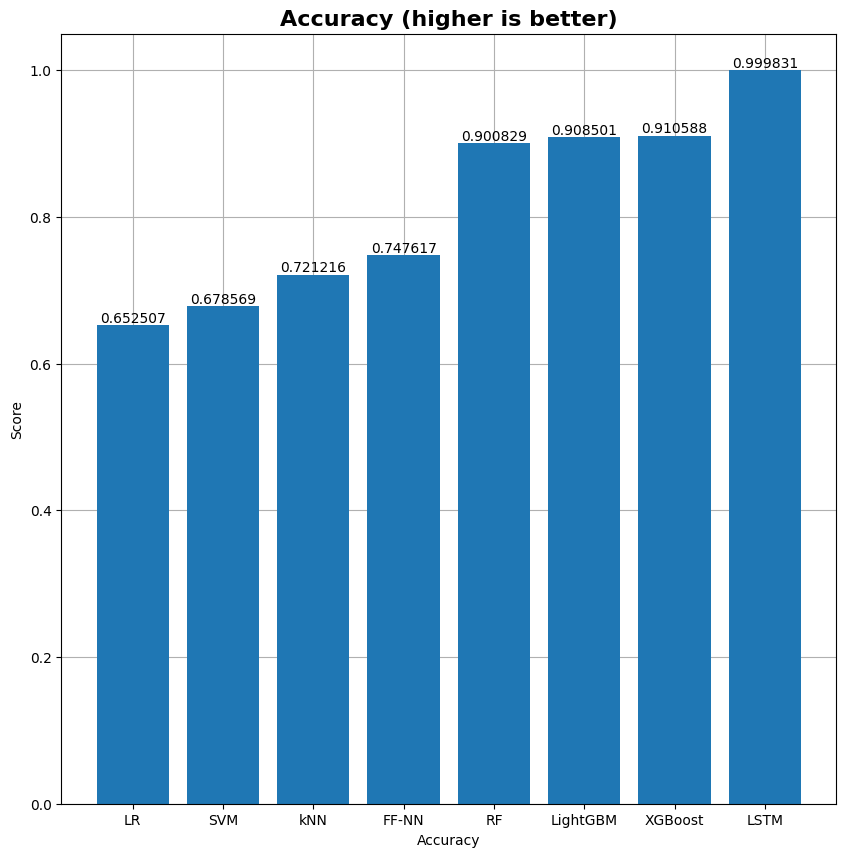

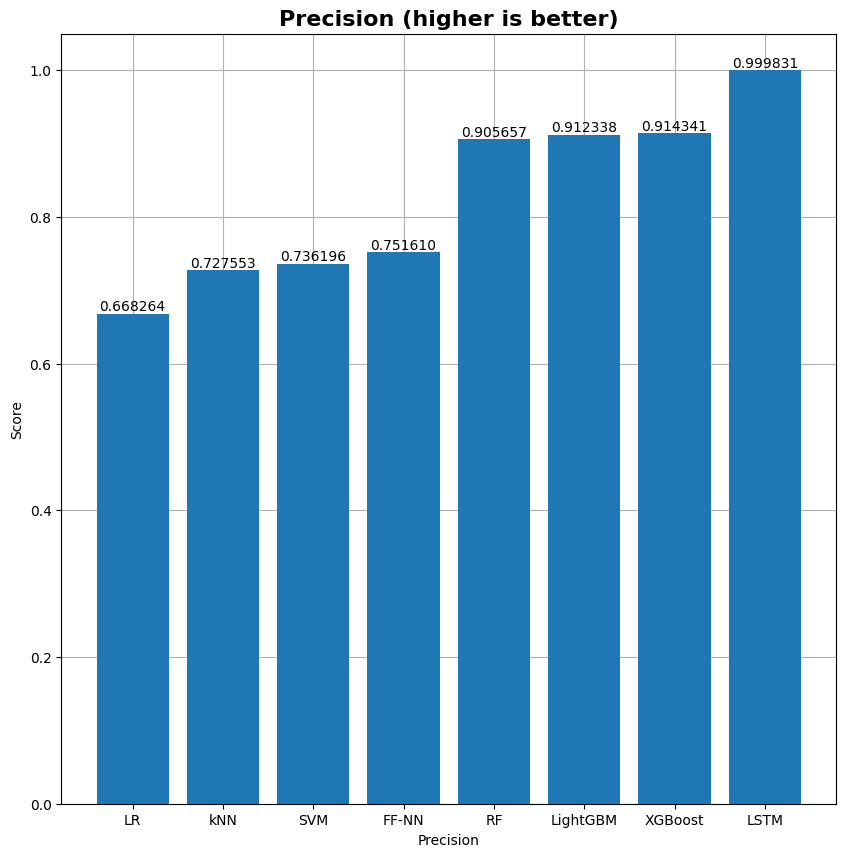

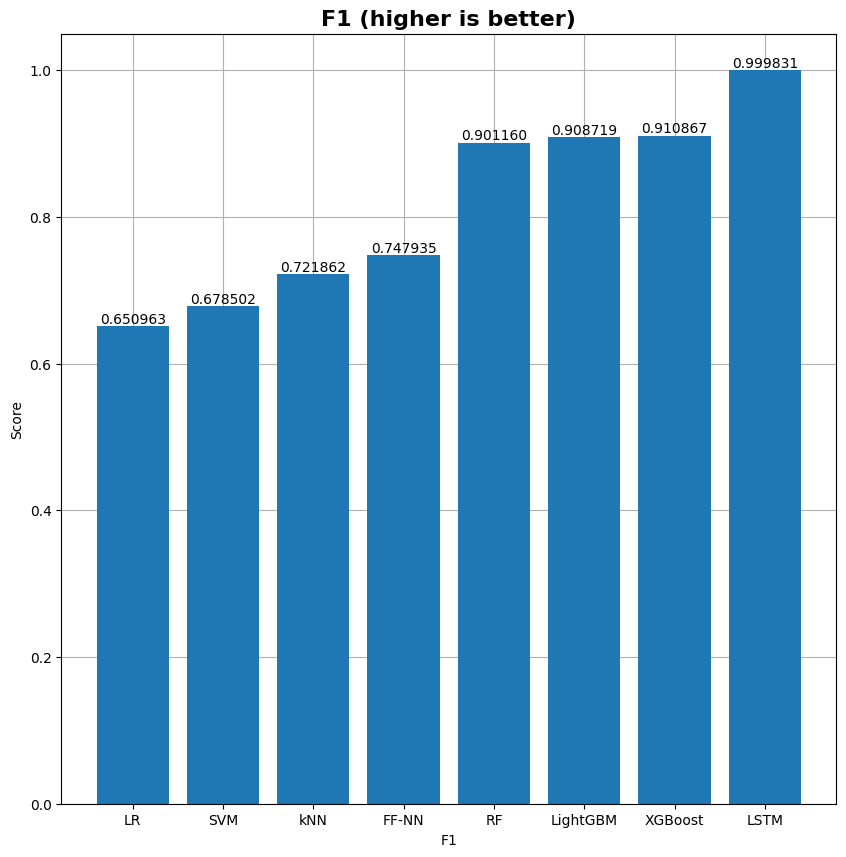

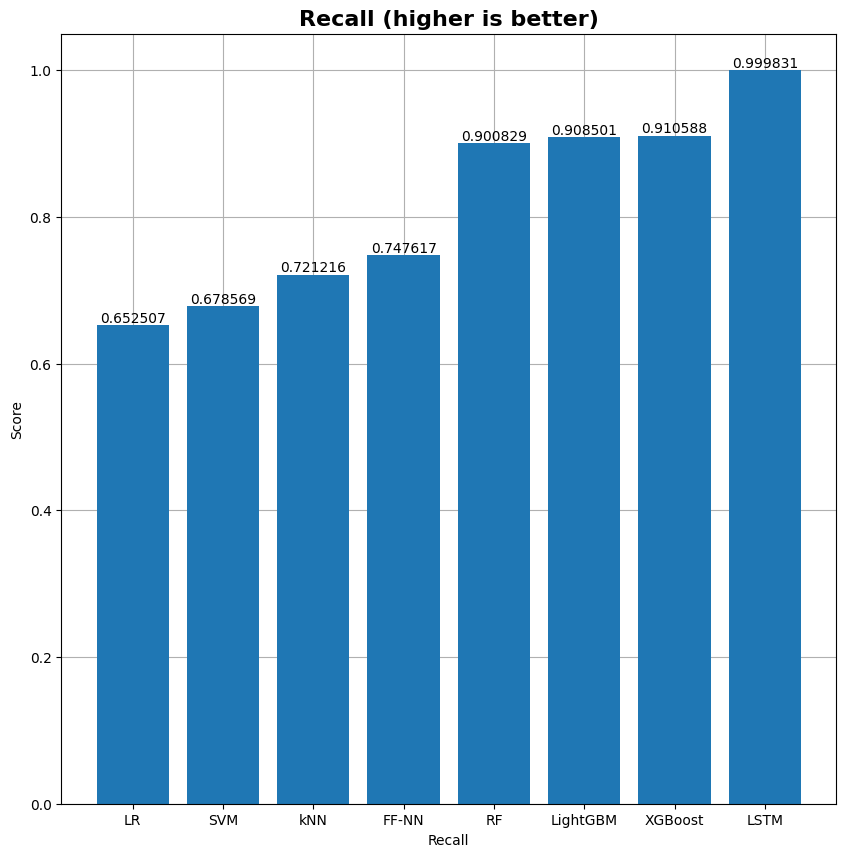

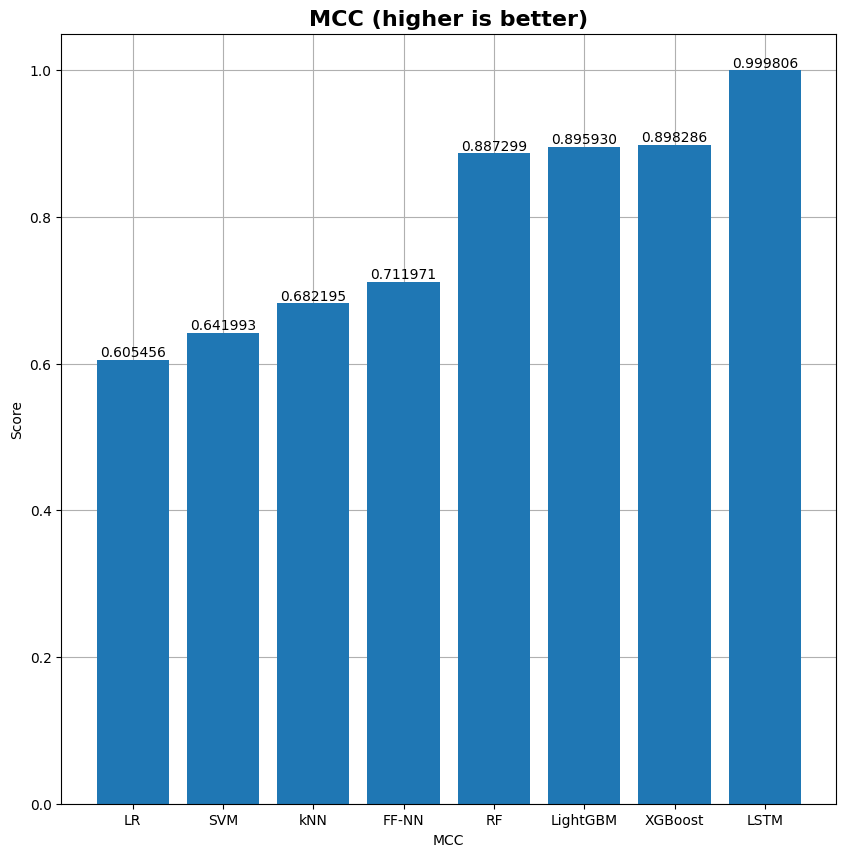

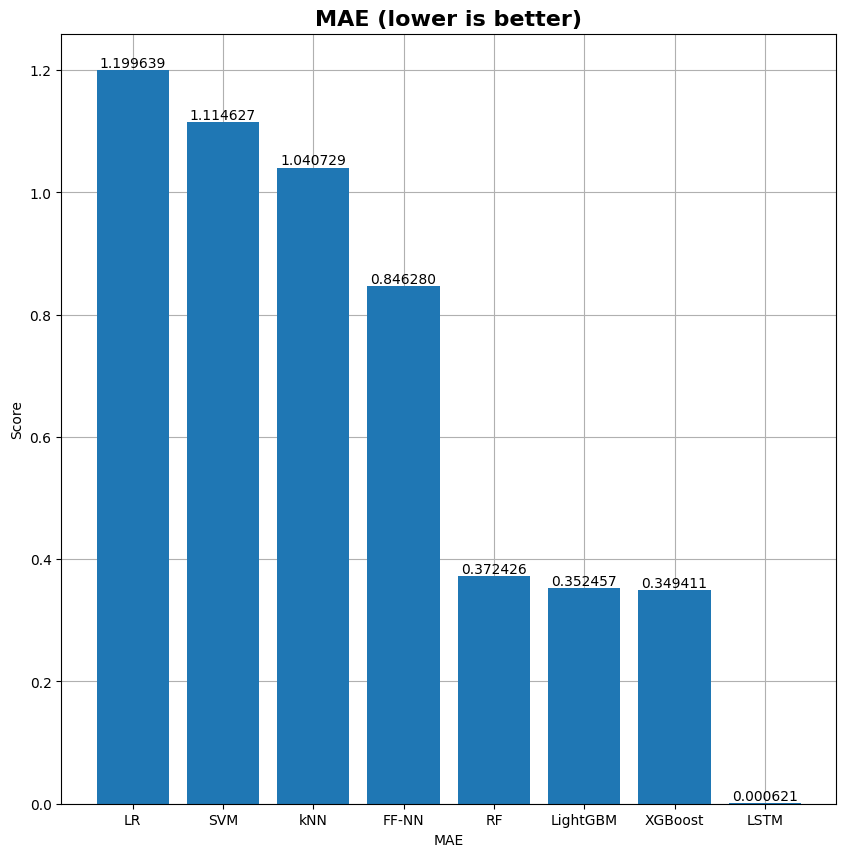

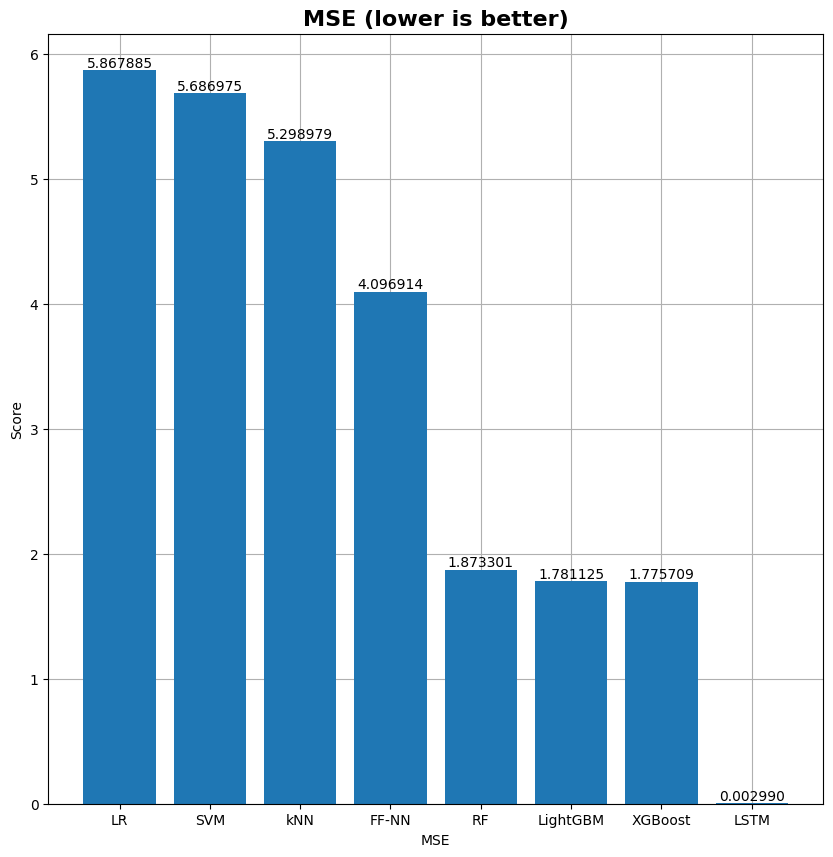

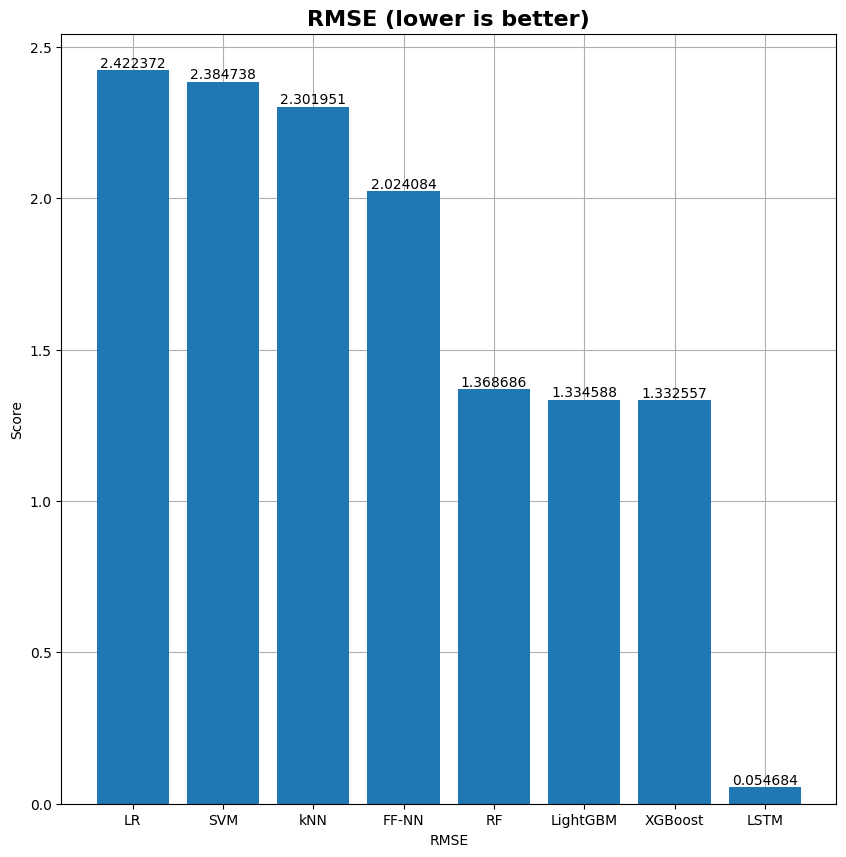

In [81]:
for x in results_df:
    _dict = {}
    name = results_df[x].name
    for keys, values in zip(range(len(results_df[x].keys())), results_df[x]):
        _dict[results_df[x].keys()[keys]] = values
    result_plot(_dict, name)